<h3><i><b> PYTORCH - Training on MNIST Dataset </h3>
<h4> Session 6 </h4>


### Imports <hr>

In [10]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [11]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [12]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000002D46A6FDBD0>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [13]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            transforms.Resize((28, 28)),
            transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms), **self.kwargs) 

    def test_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms), **self.kwargs) 

##### Create Batch loader for train/test dataset  <hr>

In [14]:
get_data = Dataset(batch_size=128)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

In [15]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([128, 1, 28, 28])
Total images in the batch - 128


##### View sample images from the train loader  <hr>



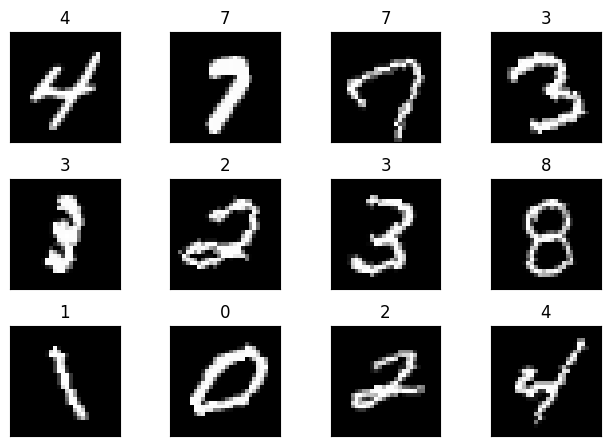

In [16]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [17]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
       BatchNorm2d-2           [-1, 16, 28, 28]              32
           Dropout-3           [-1, 16, 28, 28]               0
            Conv2d-4           [-1, 24, 28, 28]           3,456
       BatchNorm2d-5           [-1, 24, 28, 28]              48
           Dropout-6           [-1, 24, 28, 28]               0
         MaxPool2d-7           [-1, 24, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]             384
       BatchNorm2d-9           [-1, 16, 14, 14]              32
          Dropout-10           [-1, 16, 14, 14]               0
           Conv2d-11           [-1, 24, 14, 14]           3,456
      BatchNorm2d-12           [-1, 24, 14, 14]              48
          Dropout-13           [-1, 24, 14, 14]               0
           Conv2d-14           [-1, 32,

Model training

---


In [18]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=11, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1365 Batch_id=468 Accuracy=88.47: 100%|██████████| 469/469 [00:10<00:00, 44.98it/s]


Test set: Average loss: 0.0505, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1083 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:10<00:00, 45.12it/s]


Test set: Average loss: 0.0326, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0542 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:10<00:00, 44.68it/s]


Test set: Average loss: 0.0295, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0726 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:10<00:00, 44.71it/s]


Test set: Average loss: 0.0294, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0264 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:10<00:00, 45.77it/s]


Test set: Average loss: 0.0227, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0949 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:10<00:00, 44.97it/s]


Test set: Average loss: 0.0276, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0711 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:10<00:00, 45.23it/s]


Test set: Average loss: 0.0221, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0209 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:10<00:00, 44.85it/s]


Test set: Average loss: 0.0213, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1213 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:10<00:00, 44.69it/s]


Test set: Average loss: 0.0179, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0895 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:10<00:00, 44.81it/s]


Test set: Average loss: 0.0179, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0082 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:10<00:00, 44.05it/s]


Test set: Average loss: 0.0185, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0587 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:10<00:00, 45.63it/s]


Test set: Average loss: 0.0163, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0465 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:10<00:00, 44.86it/s]


Test set: Average loss: 0.0159, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0044 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:10<00:00, 45.38it/s]


Test set: Average loss: 0.0159, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0913 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:10<00:00, 45.42it/s]


Test set: Average loss: 0.0153, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the Loss/Accuracy for Train/Test dataset

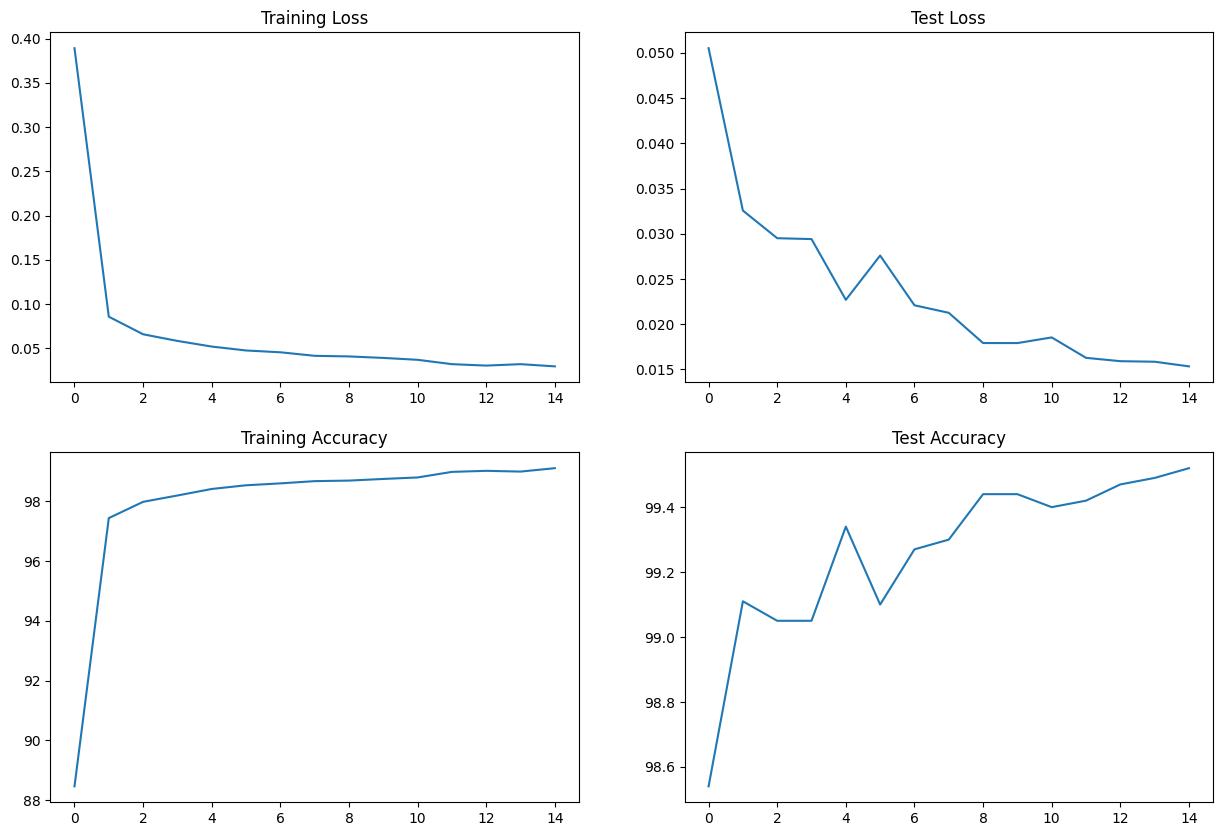

In [19]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()